In [1]:
import librosa
import librosa.display
from splitTransients import getTransientLocations, saveTransients, locationsToSpectrograms #, locationsToSamples
import matplotlib.pyplot as plt
import numpy as np

The next bit saves the start and stop times of each sound in soundFile into transientTimes, and saves the frames of each sound into transientSamples.

transientTimes: List of tuples (start, stop)

transientSamples: List of lists

In [2]:
soundFile = '../sound-files/first-four-seconds.wav'
midiFile = '../midi/first-four-seconds.mid'

sr = 44100
y, sr = librosa.load(soundFile, sr)

#sr = librosa.get_samplerate(soundFile)
midiLocations = getTransientLocations(y, midiFile)
transientLocations = getTransientLocations(y)


In [3]:
#Save the sounds if you like
saveTransients(y, './transients', sr=sr)
saveTransients(y, './transientsFromMidi', midiFile=midiFile, sr=sr)

I then create a Short-time Fourier transform for each of the sounds

In [4]:
S = locationsToSpectrogram(y, midiLocations)


And can display each as a spectrogram. I can see from the spectrograms that sample_30, sample_24, sample_16, and sample_7 look like they are similar, and when I listen to them they sound similar, especially when compared to sounds like sample_31. Sample_13 and sample_14 look kinda similar, and have a similar sound also. Same with 12 and 20

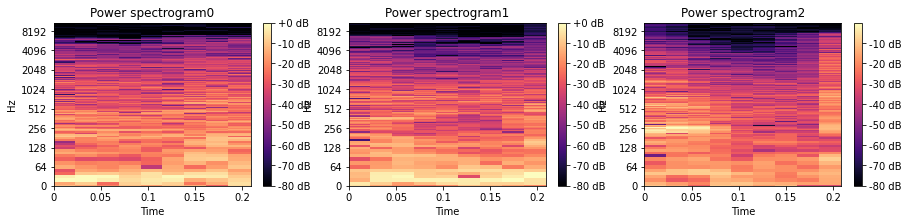

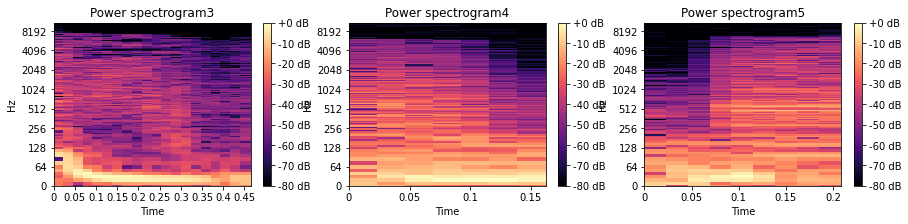

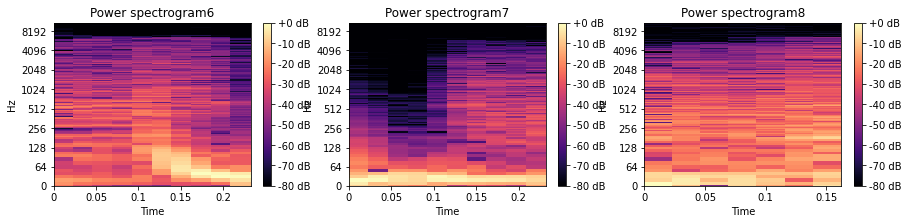

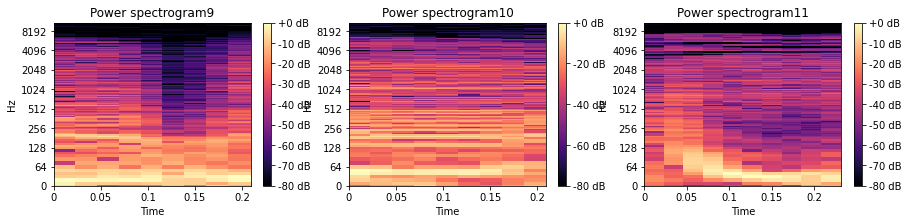

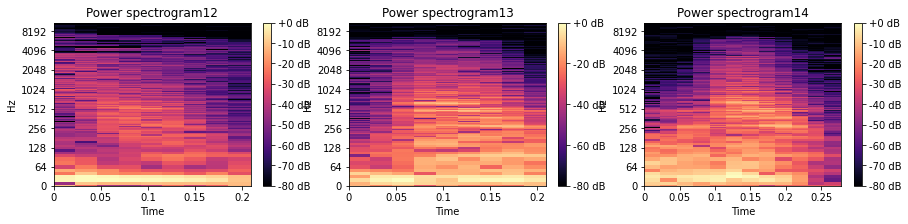

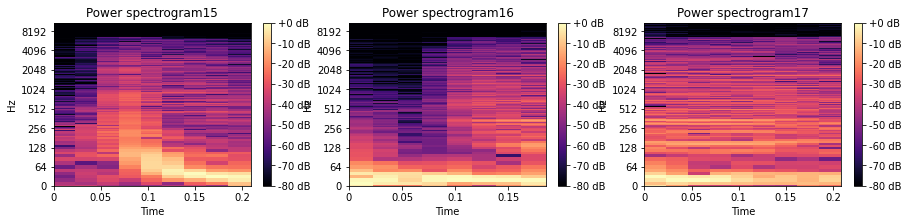

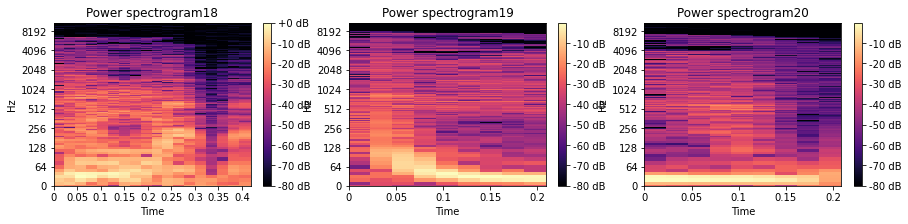

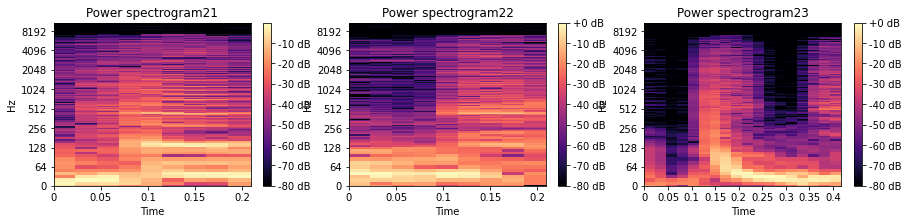

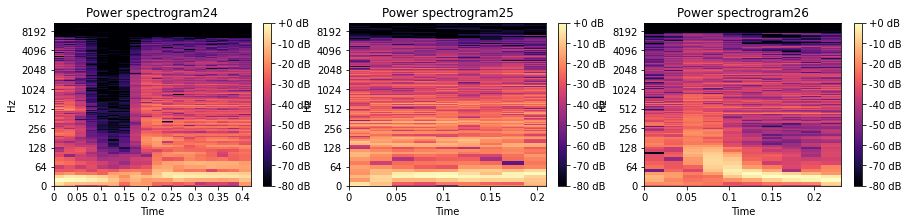

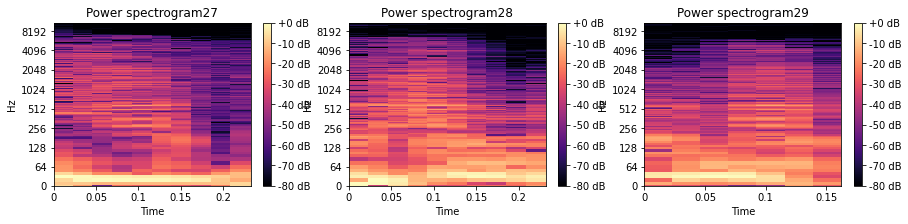

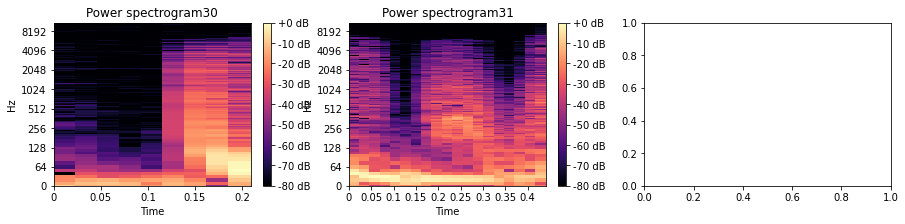

In [5]:
def drawSpecs(specList):
    for stft in range(0, len(S), 3):
        fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
        img1 = librosa.display.specshow(librosa.amplitude_to_db(specList[stft], ref=np.max), y_axis='log', x_axis='time', ax=ax1)
        ax1.set_title('Power spectrogram' + str(stft))
        fig.colorbar(img1, ax=ax1, format="%+2.0f dB")
        
        if (stft+1 < len(specList)):
            img2 = librosa.display.specshow(librosa.amplitude_to_db(specList[stft+1], ref=np.max), y_axis='log', x_axis='time', ax=ax2)
            ax2.set_title('Power spectrogram' + str(stft+1))
            fig.colorbar(img2, ax=ax2, format="%+2.0f dB")

        if (stft+2 < len(specList)):
            img3 = librosa.display.specshow(librosa.amplitude_to_db(specList[stft+2], ref=np.max), y_axis='log', x_axis='time', ax=ax3)
            ax3.set_title('Power spectrogram' + str(stft+2))
            fig.colorbar(img3, ax=ax3, format="%+2.0f dB")

drawSpecs(S)

I know that I can do a few things like calculate the rms, centroids and mfccs, but I don't know how to use these things to sort my original samples and times.

I would like my midiTimes array, to have the same sorting as my midiSamples array

In [8]:
# midiSamples = 
# rms = [librosa.feature.rms(S=s) for s in S]
# centroids = [librosa.feature.spectral_centroid(y=y, sr=sr) for y in midiSamples]
# mfccs = [librosa.feature.mfcc(y=y, sr=sr) for y in midiSamples]

Calculate the similarity coefficients of each Spectrogram to each other spectrogram. Since sounds are different lengths, the length of the sound is trimmed to the shortest sound length

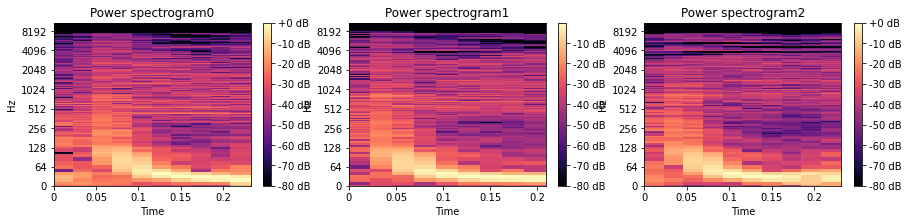

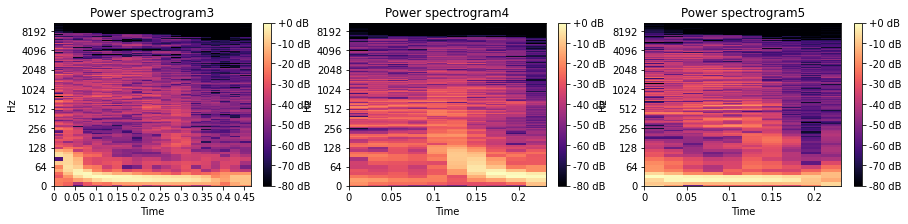

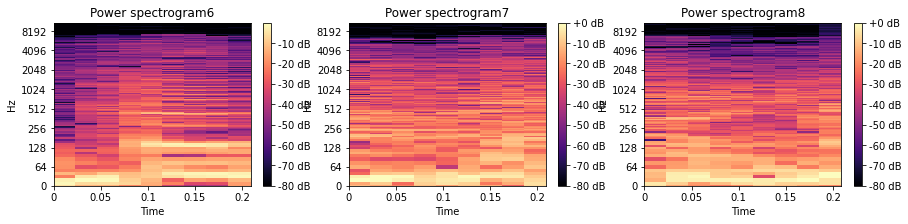

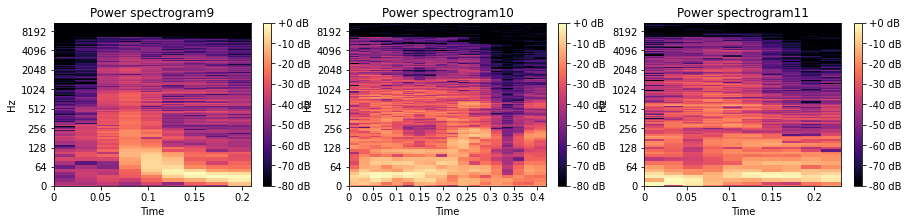

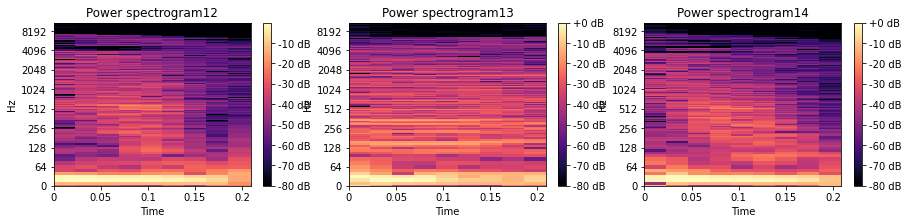

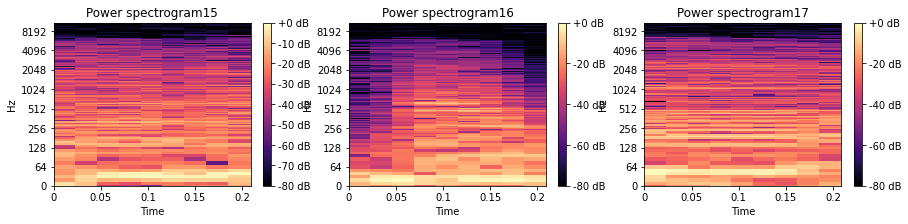

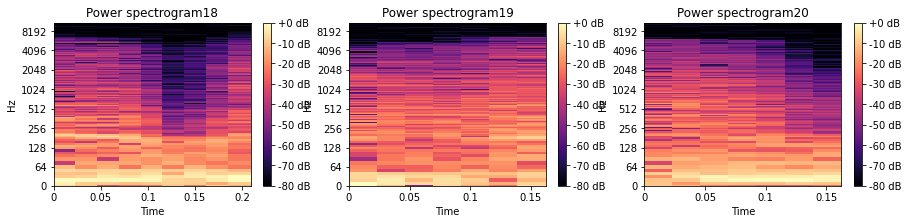

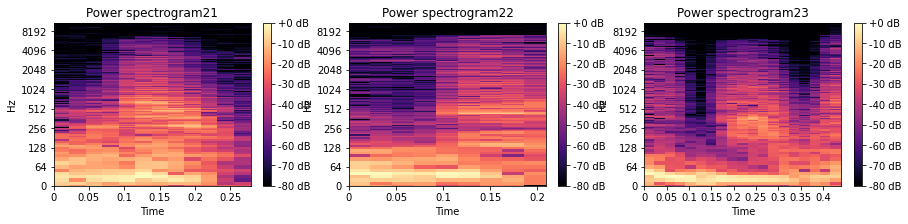

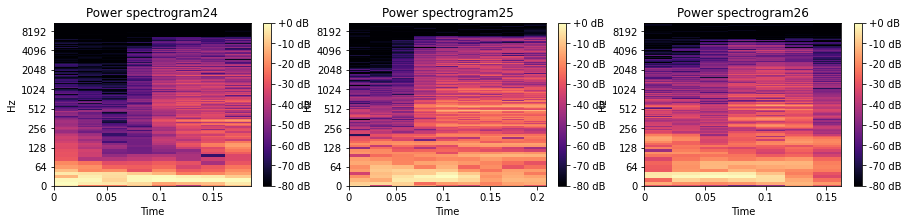

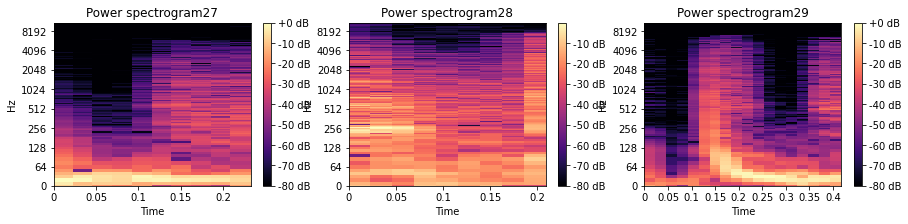

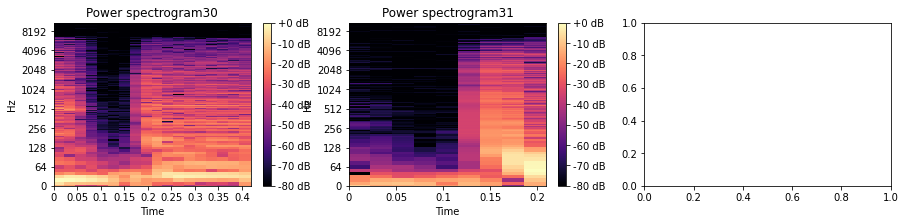

In [82]:
drawSpecs(sortSpecs)